In [1]:
import jax
import jax.numpy as jnp

In [2]:
a = jnp.asarray((1.0, 3.2, -1.5))

In [3]:
print(a)

[ 1.   3.2 -1.5]


In [4]:
print(jnp.sum(a))

2.6999998


In [5]:
print(jnp.mean(a))

0.9


In [6]:
print(jnp.dot(a, a))

13.490001


In [7]:
a

Array([ 1. ,  3.2, -1.5], dtype=float32)

In [8]:
type(a)

jaxlib.xla_extension.ArrayImpl

In [9]:
jnp.sum(a)

Array(2.6999998, dtype=float32)

In [10]:
A = jnp.ones((2, 2))
B = jnp.identity(2)
A @ B

Array([[1., 1.],
       [1., 1.]], dtype=float32)

In [11]:
from jax.numpy import linalg

In [12]:
linalg.inv(B)   # Inverse of identity is identity

Array([[1., 0.],
       [0., 1.]], dtype=float32)

In [13]:
linalg.eigh(B)  # Computes eigenvalues and eigenvectors

(Array([0.99999994, 0.99999994], dtype=float32),
 Array([[1., 0.],
        [0., 1.]], dtype=float32))

In [14]:
jax.config.update("jax_enable_x64", True)

In [15]:
jnp.ones(3)

Array([1., 1., 1.], dtype=float64)

In [16]:
import numpy as np
a = np.linspace(0, 1, 3)
a

array([0. , 0.5, 1. ])

In [17]:
a[0] = 1
a

array([1. , 0.5, 1. ])

In [18]:
a = jnp.linspace(0, 1, 3)
a

Array([0. , 0.5, 1. ], dtype=float64)

In [19]:
a[0] = 1

TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [20]:
a = np.array((2, 1))
a.sort()
a

array([1, 2])

In [21]:
a = jnp.array((2, 1))
a_new = a.sort()
a, a_new

(Array([2, 1], dtype=int64), Array([1, 2], dtype=int64))

In [22]:
a = jnp.linspace(0, 1, 3)
id(a)

52972880

In [23]:
a

Array([0. , 0.5, 1. ], dtype=float64)

In [24]:
a.at[0].set(1)

Array([1. , 0.5, 1. ], dtype=float64)

In [25]:
id(a)

52972880

In [26]:
import jax.random as random

In [27]:
key = random.PRNGKey(1)

In [28]:
type(key)

jaxlib.xla_extension.ArrayImpl

In [29]:
print(key)

[0 1]


In [30]:
x = random.normal(key, (3, 3))
x

Array([[-1.35247421, -0.2712502 , -0.02920518],
       [ 0.34706456,  0.5464053 , -1.52325812],
       [ 0.41677264, -0.59710138, -0.5678208 ]], dtype=float64)

In [31]:
random.normal(key, (3, 3))

Array([[-1.35247421, -0.2712502 , -0.02920518],
       [ 0.34706456,  0.5464053 , -1.52325812],
       [ 0.41677264, -0.59710138, -0.5678208 ]], dtype=float64)

In [32]:
key, subkey = random.split(key)

In [33]:
random.normal(key, (3, 3))

Array([[ 1.85374374, -0.37683949, -0.61276867],
       [-1.91829718,  0.27219409,  0.54922246],
       [ 0.40451442, -0.58726839, -0.63967753]], dtype=float64)

In [34]:
random.normal(subkey, (3, 3))

Array([[-0.4300635 ,  0.22778552,  0.57241269],
       [-0.15969178,  0.46719192,  0.21165091],
       [ 0.84118631,  1.18671326, -0.16607783]], dtype=float64)

In [35]:
def gen_random_matrices(key, n, k):
    matrices = []
    for _ in range(k):
        key, subkey = random.split(key)
        matrices.append(random.uniform(subkey, (n, n)))
    return matrices

In [36]:
matrices = gen_random_matrices(key, 2, 2)
for A in matrices:
    print(A)

[[0.97440813 0.3838544 ]
 [0.9790686  0.99981046]]
[[0.3473302  0.17157842]
 [0.89346686 0.01403153]]


In [37]:
random.normal(key, (5, ))

Array([-0.64377279,  0.76961857, -0.29809604,  0.47858776, -2.00591299],      dtype=float64)

In [38]:
def f(x):
    a = 3*x + jnp.sin(x) + jnp.cos(x**2) - jnp.cos(2*x) - x**2 * 0.4 * x**1.5
    return jnp.sum(a)

In [39]:
n = 50_000_000
x = jnp.ones(n)

In [40]:
%time f(x).block_until_ready()

CPU times: user 170 ms, sys: 1.02 ms, total: 171 ms
Wall time: 387 ms


Array(2.19896006e+08, dtype=float64)

In [41]:
%time f(x).block_until_ready()

CPU times: user 3.41 ms, sys: 7.51 ms, total: 10.9 ms
Wall time: 98 ms


Array(2.19896006e+08, dtype=float64)

In [42]:
m = 50_000_001
y = jnp.ones(m)

In [43]:
%time f(y).block_until_ready()

CPU times: user 165 ms, sys: 0 ns, total: 165 ms
Wall time: 371 ms


Array(2.19896011e+08, dtype=float64)

In [44]:
%time f(y).block_until_ready()

CPU times: user 1.39 ms, sys: 1.46 ms, total: 2.85 ms
Wall time: 91.6 ms


Array(2.19896011e+08, dtype=float64)

In [45]:
%time f(x).block_until_ready()

CPU times: user 1.7 ms, sys: 754 μs, total: 2.46 ms
Wall time: 91.3 ms


Array(2.19896006e+08, dtype=float64)

In [46]:
f_jit = jax.jit(f)   # target for JIT compilation

In [47]:
f_jit(x)

Array(2.19896006e+08, dtype=float64)

In [48]:
%time f_jit(x).block_until_ready()

CPU times: user 1.06 ms, sys: 0 ns, total: 1.06 ms
Wall time: 58.4 ms


Array(2.19896006e+08, dtype=float64)

In [49]:
@jax.jit
def f(x):
    a = 3*x + jnp.sin(x) + jnp.cos(x**2) - jnp.cos(2*x) - x**2 * 0.4 * x**1.5
    return jnp.sum(a)

In [50]:
a = 1  # global

@jax.jit
def f(x):
    return a + x

In [51]:
x = jnp.ones(2)

In [52]:
f(x)

Array([2., 2.], dtype=float64)

In [53]:
a = 42

In [54]:
f(x)

Array([2., 2.], dtype=float64)

In [55]:
x = jnp.ones(3)

In [56]:
f(x)

Array([43., 43., 43.], dtype=float64)

In [57]:
def f(x):
    return (x**2) / 2

In [58]:
f_prime = jax.grad(f)

In [59]:
f_prime(10.0)

Array(10., dtype=float64, weak_type=True)

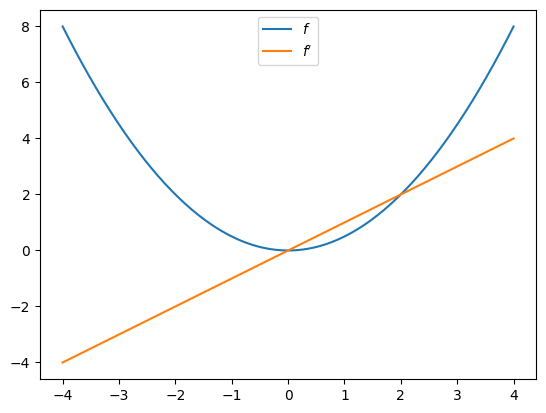

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_grid = jnp.linspace(-4, 4, 200)
ax.plot(x_grid, f(x_grid), label="$f$")
ax.plot(x_grid, [f_prime(x) for x in x_grid], label="$f'$")
ax.legend(loc='upper center')
plt.show()

In [61]:
@jax.jit
def f(x, y):
    return jnp.cos(x**2 + y**2) / (1 + x**2 + y**2)

n = 80
x = jnp.linspace(-2, 2, n)
y = x

z_loops = np.empty((n, n))

In [62]:
%%time
for i in range(n):
    for j in range(n):
        z_loops[i, j] = f(x[i], y[j])

CPU times: user 2.82 s, sys: 579 ms, total: 3.39 s
Wall time: 2.37 s


In [63]:
z_bad = f(x, y)

In [64]:
z_bad.shape

(80,)

In [65]:
z_loops.shape

(80, 80)